In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import numpy as np
import scipy.stats as st

In [31]:
df = pd.read_csv('flixable_df.csv')
df.head()

,Unnamed: 0,date,link,title,description,href,rating
0,0,January 29,https://flixable.com/title/below-zero/,Below Zero,2021,https://www.imdb.com/title/tt4016994/?ref_=tt_...,7.5/10
1,1,January 29,https://flixable.com/title/finding-ohana/,Finding ‘Ohana,2021,https://www.imdb.com/title/tt10332588/?ref_=tt...,6.1/10
2,2,January 29,https://flixable.com/title/the-dig/,The Dig,2021,https://www.imdb.com/title/tt3661210/?ref_=tt_...,7.2/10
3,3,January 29,https://flixable.com/title/we-are-the-brooklyn...,We Are: The Brooklyn...,2021,https://www.imdb.com/title/tt3661210/?ref_=tt_...,7.2/10
4,4,January 28,https://flixable.com/title/june-kopi/,June & Kopi,2021,https://www.imdb.com/title/tt13728764/?ref_=tt...,6.8/10


# 2019 movies Database

In [32]:
title = []
genre = []
lang = []
idx = []
irating = []
ivotes = []
year = []
movie19 = df.loc[df['description']==2019,'title']
movie20 = df.loc[df['description']==2020,'title']
print(len(movie19))
print(len(movie20))
def fetch_db (movies):
    for each_movie in movies:
        url = f"http://www.omdbapi.com/?t={each_movie}&apikey=154b8ad6" # api key needs to be hidden
        try:

            response = requests.get(url)
            data = response.json()
            title.append(data['Title'])
            ivotes.append(data['imdbVotes'])
            irating.append(data['imdbRating'])
#             idx.append(data['imdbID'])
            genre.append(data['Genre'].split(','))
        except:
            print('incomplete data')

    movie_df = pd.DataFrame({'MovieID':idx, 'Title': title, 'Votes':ivotes, 'Rating': irating, 'Genre': genre})
    return(movie_df)


movie19_db = fetch_db(movie19)


972
877
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data


In [69]:
movie19_db

,MovieID,Title,Votes,Rating,Genre
0,tt10279104,Hire a Woman,7.0,5.7,"[Comedy, Romance]"
1,tt1527731,She Is,8.0,8.1,"[Short, Adventure, Drama, Musical, Romance]"
3,tt9854932,Pinkfong Wonderstar,10.0,7.1,[Animation]
4,tt11287390,Al Acecho,118.0,5.1,[Thriller]
5,tt5771332,QB1: Beyond the Lights,732.0,7.8,"[Documentary, Sport]"
...,...,...,...,...,...
878,tt9482786,Sebastian Maniscalco: Stay Hungry,1071.0,7.1,[Comedy]
880,tt0985991,Horrid Henry,648.0,6.2,"[Animation, Comedy, Family, Fantasy, Music]"
881,tt9046562,ReMastered: Massacre at the Stadium,601.0,7.3,"[Documentary, Drama]"
884,tt8685446,Comedians of the World,404.0,6.5,[Comedy]


In [35]:

# cleaning up the data
movie19_db['Votes'].replace(',','', regex=True, inplace=True)
movie19_db['Rating'].replace(',','', regex=True, inplace=True)
# remove commas from votes and ratings
movie19_db['Votes'] = movie19_db['Votes'].apply(pd.to_numeric, downcast='float', errors='coerce')
movie19_db['Rating'] = movie19_db['Rating'].apply(pd.to_numeric, downcast='float', errors='coerce')
# convert to float for numeric calculation

In [36]:
movie19_db.dtypes

MovieID     object
Title       object
Votes      float64
Rating     float64
Genre       object
dtype: object

In [37]:
#Dropping rows with null value
movie19_db.dropna(inplace=True)
len(movie19_db)

871

In [38]:
new_genre = []
for i in movie19_db['Genre']:
    for j in i:
        new_genre.append(j.strip())
    
genre_list = np.unique(new_genre)
genre_list.sort()
genre_list
genre_df = pd.DataFrame({'Genre':genre_list})
genre_df #25 different genre

,Genre
0,Action
1,Adventure
2,Animation
3,Biography
4,Comedy
5,Crime
6,Documentary
7,Drama
8,Family
9,Fantasy


9.0 3.5999999046325684 9.40000033378601 3.799999952316284


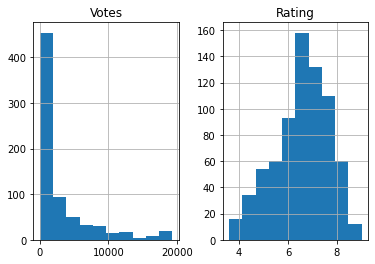

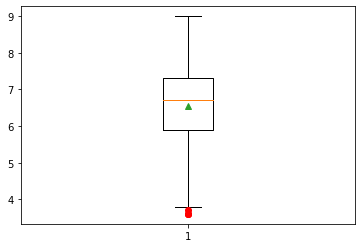

729
3.5999999046325684 23
3.700000047683716 123
3.5999999046325684 277
3.5999999046325684 562


In [61]:
movie19_db.hist()
# the shape of data and outliers for movie Ratings
q1 = np.quantile(movie19_db['Rating'],0.25) 
q3 = np.quantile(movie19_db['Rating'],0.75)
IQR = q3 - q1
R_upbound = q3+(1.5* IQR)
R_lowbound = q1-(1.5*IQR)

# print(max(movie19_db['Rating']),min(movie19_db['Rating']),R_upbound,R_lowbound)
    
#Boxplot to view the data and trends in Ratings
fig1, ax1 = plt.subplots()
ax1.boxplot(movie19_db['Rating'],  sym = 'r', showmeans = True)


plt.show()   
print(len(movie19_db))
#dropping the outliers
for idx, srs in movie19_db.iterrows():
    if srs['Rating']<R_lowbound:
        print(srs['Rating'],idx)
        movie19_db = movie19_db.drop(index = idx)

    

plt.show()  
    
# movie ratings are now somewhat normally distributed   

19311.0 5.0 1125.0 9067.0 -4925.0


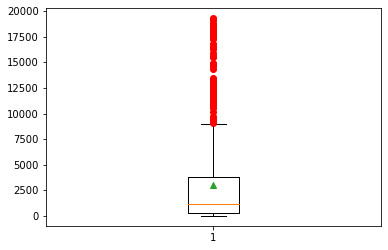

725
17465.0 47
18750.0 64
15480.0 69
11820.0 92
12604.0 99
11265.0 101
18528.0 109
19203.0 111
14394.0 121
10134.0 134
19311.0 168
18710.0 175
11407.0 176
16544.0 204
11086.0 231
10783.0 245
11991.0 251
13500.0 253
9316.0 254
9704.0 257
11466.0 296
15529.0 304
9176.0 312
11720.0 314
17271.0 328
13308.0 340
16277.0 357
14848.0 360
12435.0 371
9689.0 379
18118.0 393
9461.0 404
12193.0 411
11226.0 415
14982.0 445
10799.0 458
9105.0 502
14742.0 512
11391.0 527
11593.0 537
17542.0 539
12967.0 540
14632.0 542
15650.0 560
17634.0 572
16771.0 594
19182.0 600
9655.0 606
9239.0 615
10971.0 631
18025.0 635
18359.0 645
9561.0 663
9284.0 669
9554.0 675
13243.0 684
18786.0 731
9232.0 743
9237.0 744
11989.0 752
18764.0 756
11055.0 768
11474.0 770
12308.0 777
17779.0 787
16784.0 793
18582.0 799
15959.0 808
17407.0 812
12976.0 830
10562.0 835
12677.0 846
18465.0 848
13379.0 854
11030.0 856
13005.0 863
17929.0 879
12608.0 882
647


In [62]:
# the shape of data and outliers for Votes
q1 = np.quantile(movie19_db['Votes'],0.25) 
q3 = np.quantile(movie19_db['Votes'],0.75)
IQR = q3 - q1
V_upbound = q3+(1.5* IQR)
V_lowbound = q1-(1.5*IQR)

print(max(movie19_db['Votes']),min(movie19_db['Votes']),movie19_db['Votes'].median(),V_upbound,V_lowbound)
    
#Boxplot to view the data and trends in Ratings
fig1, ax1 = plt.subplots()
ax1.boxplot(movie19_db['Votes'],  sym = 'r', showmeans = True)


plt.show()   
print(len(movie19_db))
# dropping the outliers
for idx, srs in movie19_db.iterrows():
    if srs['Votes']>V_upbound:
        print(srs['Votes'],idx)
        movie19_db = movie19_db.drop(index = idx)

    

plt.show()  
print(len(movie19_db))   

array([[<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Rating'}>]], dtype=object)

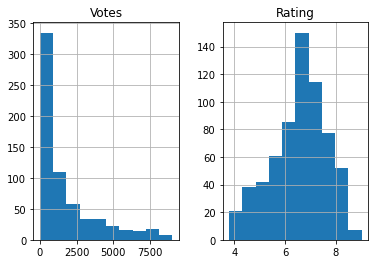

In [70]:
movie19_db.hist()
# the distribution of votes is now better dispersed but it is not a normal distribution


In [66]:
v_count=0
r_count=0
for genre in genre_df['Genre']:
    for idx , srs in movie19_db.iterrows():
        for g in srs['Genre']:
            if g == genre:
                v_count+=srs['Votes']
                r_count+=srs['Rating']
    genre_df.loc[genre_df['Genre'] == genre,'Votes']=v_count
    genre_df.loc[genre_df['Genre'] == genre,'Rating']= r_count
    v_count=0
    r_count=0

print(len(movie19_db))
genre_df

647


,Genre,Votes,Rating
0,Action,82600.0,246.200002
1,Adventure,6233.0,46.400000
2,Animation,86817.0,479.300000
3,Biography,12600.0,55.500000
4,Comedy,298871.0,969.500000
5,Crime,115955.0,241.799999
6,Documentary,168729.0,798.400003
7,Drama,235305.0,828.599999
8,Family,3083.0,42.100000
9,Fantasy,1615.0,13.500000


<AxesSubplot:xlabel='Genre'>

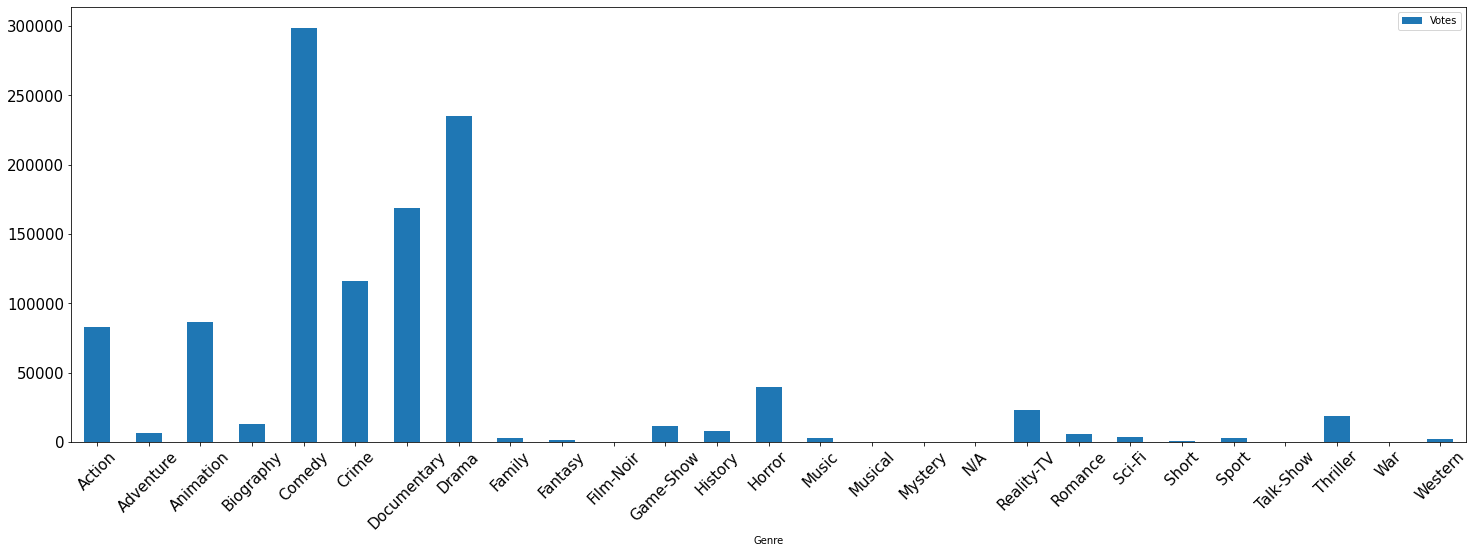

In [67]:
#delete empty genre
genre_df.plot('Genre', 'Votes', rot = 45, kind = 'bar', figsize = (25,8), fontsize = 15)

<AxesSubplot:xlabel='Genre'>

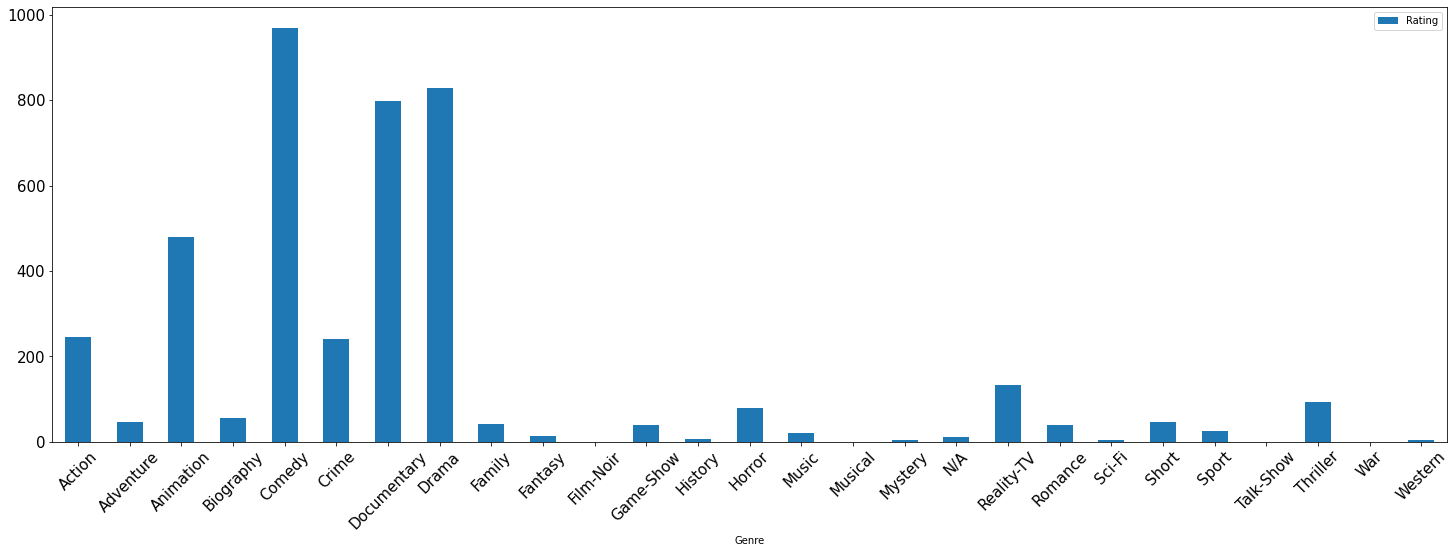

In [68]:
genre_df.plot('Genre', 'Rating', rot = 45, kind = 'bar', figsize = (25,8), fontsize = 15)

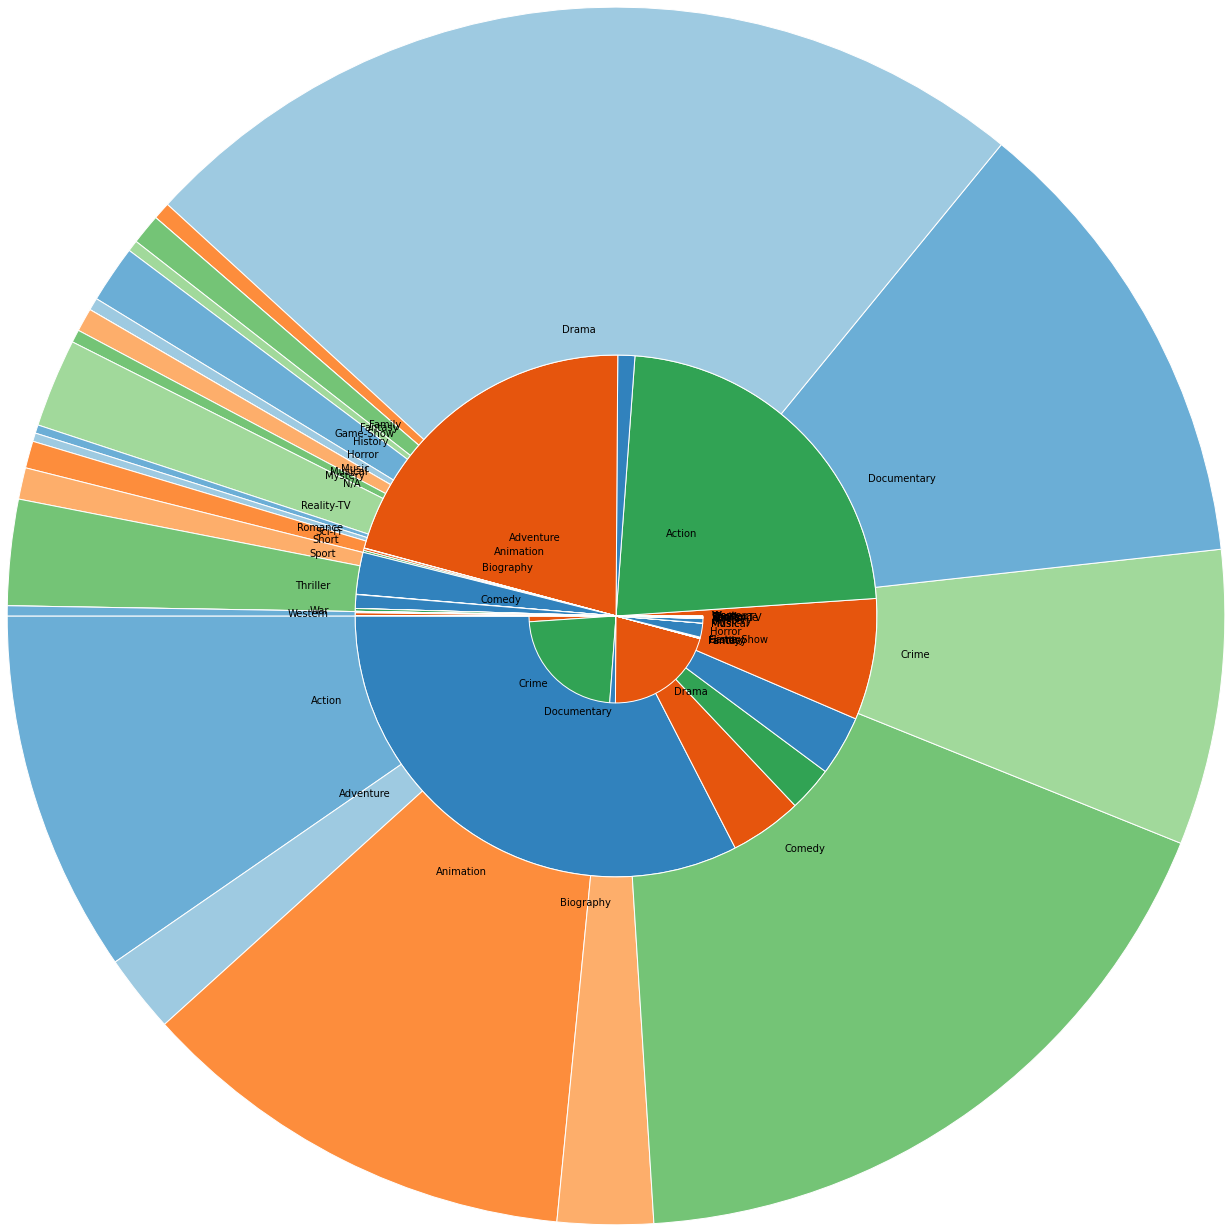

In [72]:
fig, ax = plt.subplots()
size = 4
x = genre_df['Genre']
y1= genre_df['Votes']
y2 = genre_df['Rating']

# cmap = plt.get_cmap("tab20c")
# outer_colors = cmap(np.arange(3)*4)
# inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(y1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=x)

ax.pie(y2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels = x)

plt.title='Votes VS Rating'
plt.show()


In [35]:
x.max()

2189889.0

r is 0.9867167735293779 and p is 2.964797006725159e-21


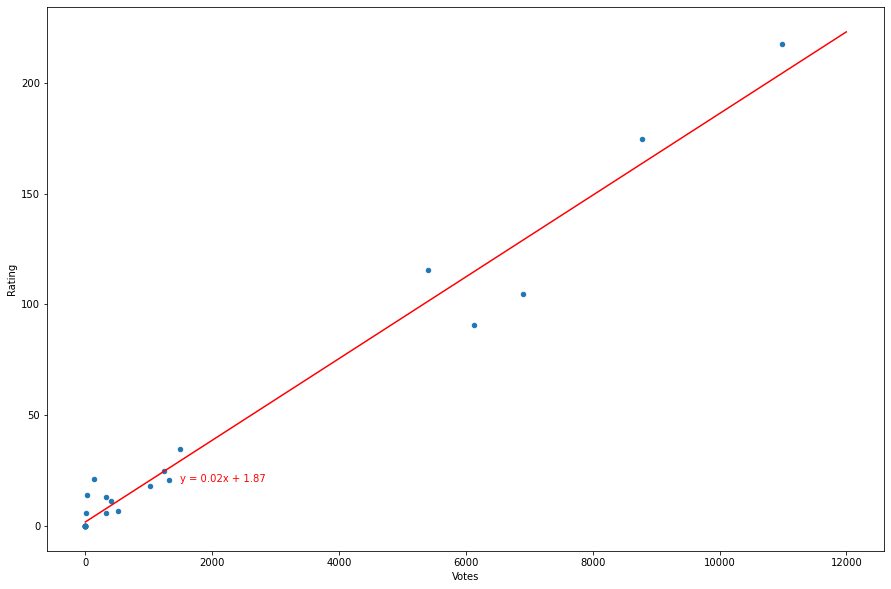

In [83]:
genre_df.plot('Votes','Rating', kind = 'scatter', figsize = (15,10), fontsize = 10)
x = genre_df['Votes']
y = genre_df['Rating']
slope, inter, r, p, std = st.linregress(x,y)
x_axis_19 = np.arange(12000)
y_pred_19 = slope*x_axis_19 +inter
plt.plot(x_axis_19,y_pred_19, c='r')
print(f'r is {r} and p is {p}')
plt.annotate(f'y = {round(slope,2)}x + {round(inter,2)} ', (1500,20), c= 'r',fontsize = 10)
plt.show()

# 2020 Movies Database


In [4]:

movie20_db = fetch_db(movie20)


incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomplete data
incomple

In [5]:
movie20_db

,MovieID,Title,Votes,Rating,Genre
0,tt0038285,Accomplice,133,5.4,"[Film-Noir, Mystery, Thriller]"
1,tt7268736,Kilometers and Kilometers,703,6.3,"[Adventure, Comedy, Drama]"
2,tt9695258,So My Grandma's a Lesbian!,43,5.7,[Comedy]
3,tt8431078,Friendsgiving,758,4.2,"[Comedy, Drama]"
4,tt3547306,Cut Throat City,"1,201",4.8,"[Action, Crime, Drama, Thriller]"
...,...,...,...,...,...
613,tt9050898,Murder to Mercy: The Cyntoia Brown Story,"2,009",6.3,[Documentary]
614,tt0048673,Summertime,"7,593",7.1,"[Drama, Romance]"
615,tt10023024,Love Aaj Kal,"6,946",5.0,"[Drama, Romance]"
616,tt10687134,Dragons: Rescue Riders,181,6.1,"[Animation, Adventure, Comedy, Fantasy]"


In [6]:

# cleaning up the data
movie20_db['Votes'].replace(',','', regex=True, inplace=True)
movie20_db['Rating'].replace(',','', regex=True, inplace=True)
# remove commas from votes and ratings
movie20_db['Votes'] = movie19_db['Votes'].apply(pd.to_numeric, downcast='float', errors='coerce')
movie20_db['Rating'] = movie19_db['Rating'].apply(pd.to_numeric, downcast='float', errors='coerce')
# convert to float for numeric calculation

In [7]:
movie20_db.dtypes


MovieID     object
Title       object
Votes      float64
Rating     float64
Genre       object
dtype: object

In [9]:
#Dropping rows with null value
movie20_db.dropna(inplace=True)
len(movie20_db)

143

In [12]:
new_genre = []
for i in movie20_db['Genre']:
    for j in i:
        new_genre.append(j.strip())
    
genre_list = np.unique(new_genre)
genre_list.sort()
genre_list
genre_df = pd.DataFrame({'Genre':genre_list})
genre_df #25 different genre

,Genre
0,Action
1,Adventure
2,Animation
3,Biography
4,Comedy
5,Crime
6,Documentary
7,Drama
8,Family
9,Fantasy


In [13]:
v_count=0
r_count=0
for genre in genre_df['Genre']:
    for idx , srs in movie20_db.iterrows():
        for g in srs['Genre']:
            if g == genre:
                v_count+=srs['Votes']
                r_count+=srs['Rating']
    genre_df.loc[genre_df['Genre'] == genre,'Votes']=v_count
    genre_df.loc[genre_df['Genre'] == genre,'Rating']= r_count
    v_count=0
    r_count=0

genre_df

,Genre,Votes,Rating
0,Action,6896.0,104.700000
1,Adventure,22.0,14.100000
2,Animation,6132.0,90.699999
3,Biography,1021.0,18.300000
4,Comedy,10991.0,217.300000
5,Crime,1500.0,34.800000
6,Documentary,5405.0,115.400000
7,Drama,8784.0,174.700000
8,Family,141.0,21.400000
9,Fantasy,0.0,0.000000


<AxesSubplot:xlabel='Genre'>

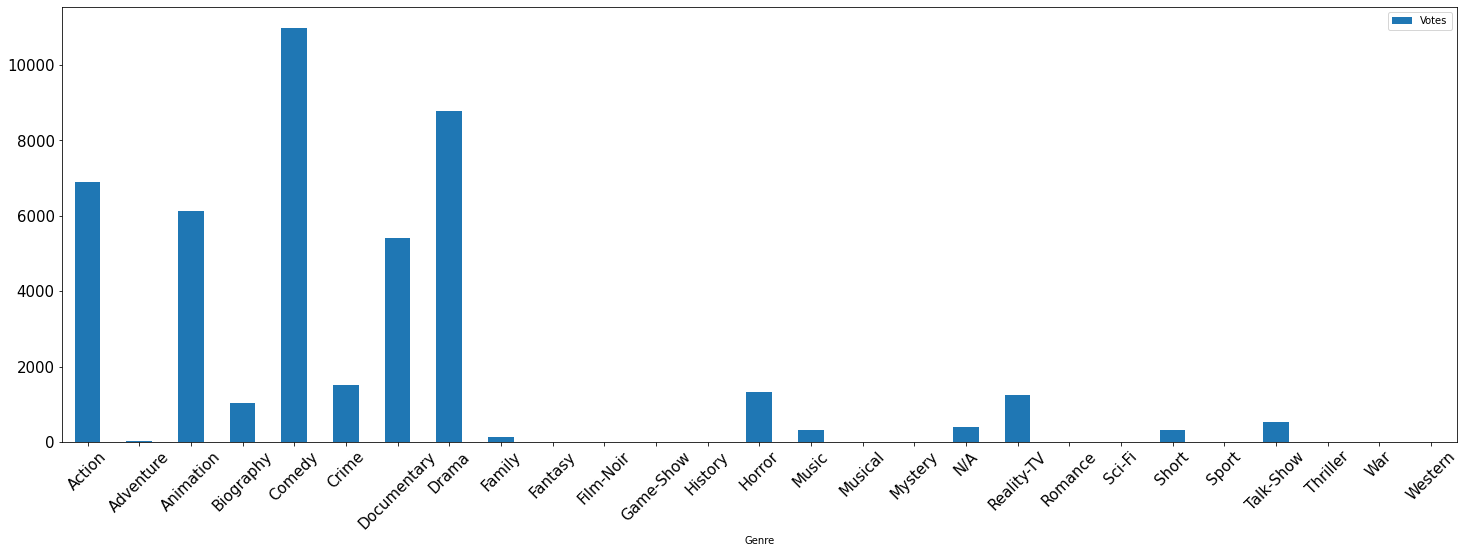

In [14]:
genre_df.plot('Genre', 'Votes', rot = 45, kind = 'bar', figsize = (25,8), fontsize = 15)

<AxesSubplot:xlabel='Genre'>

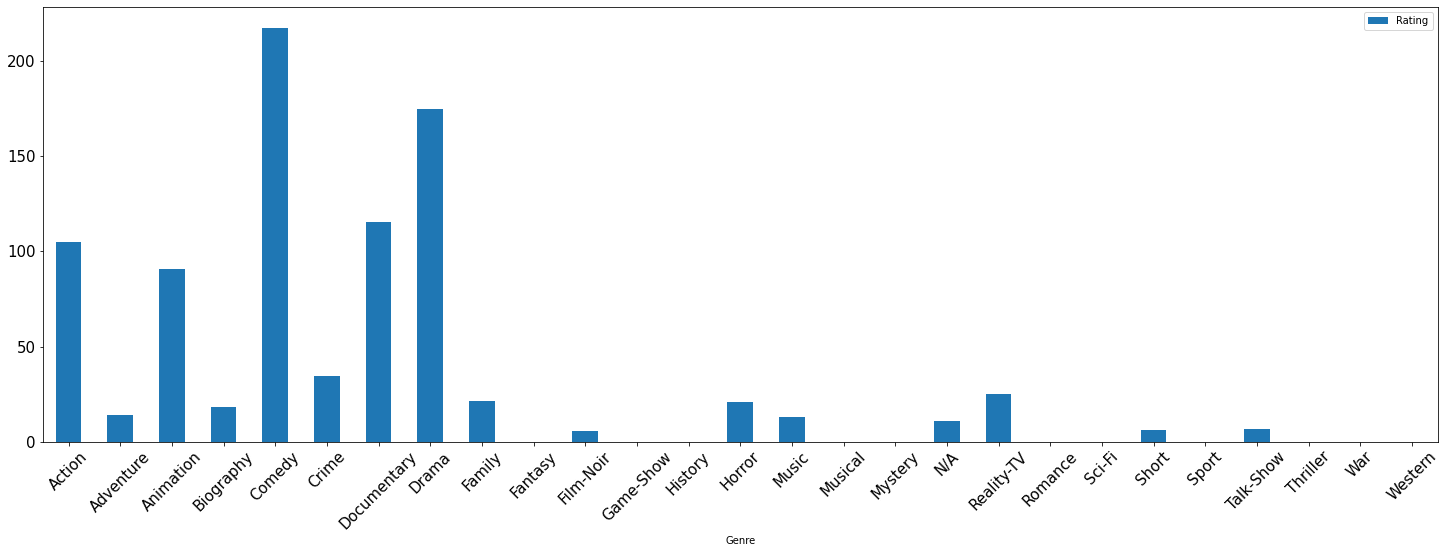

In [15]:
genre_df.plot('Genre', 'Rating', rot = 45, kind = 'bar', figsize = (25,8), fontsize = 15)

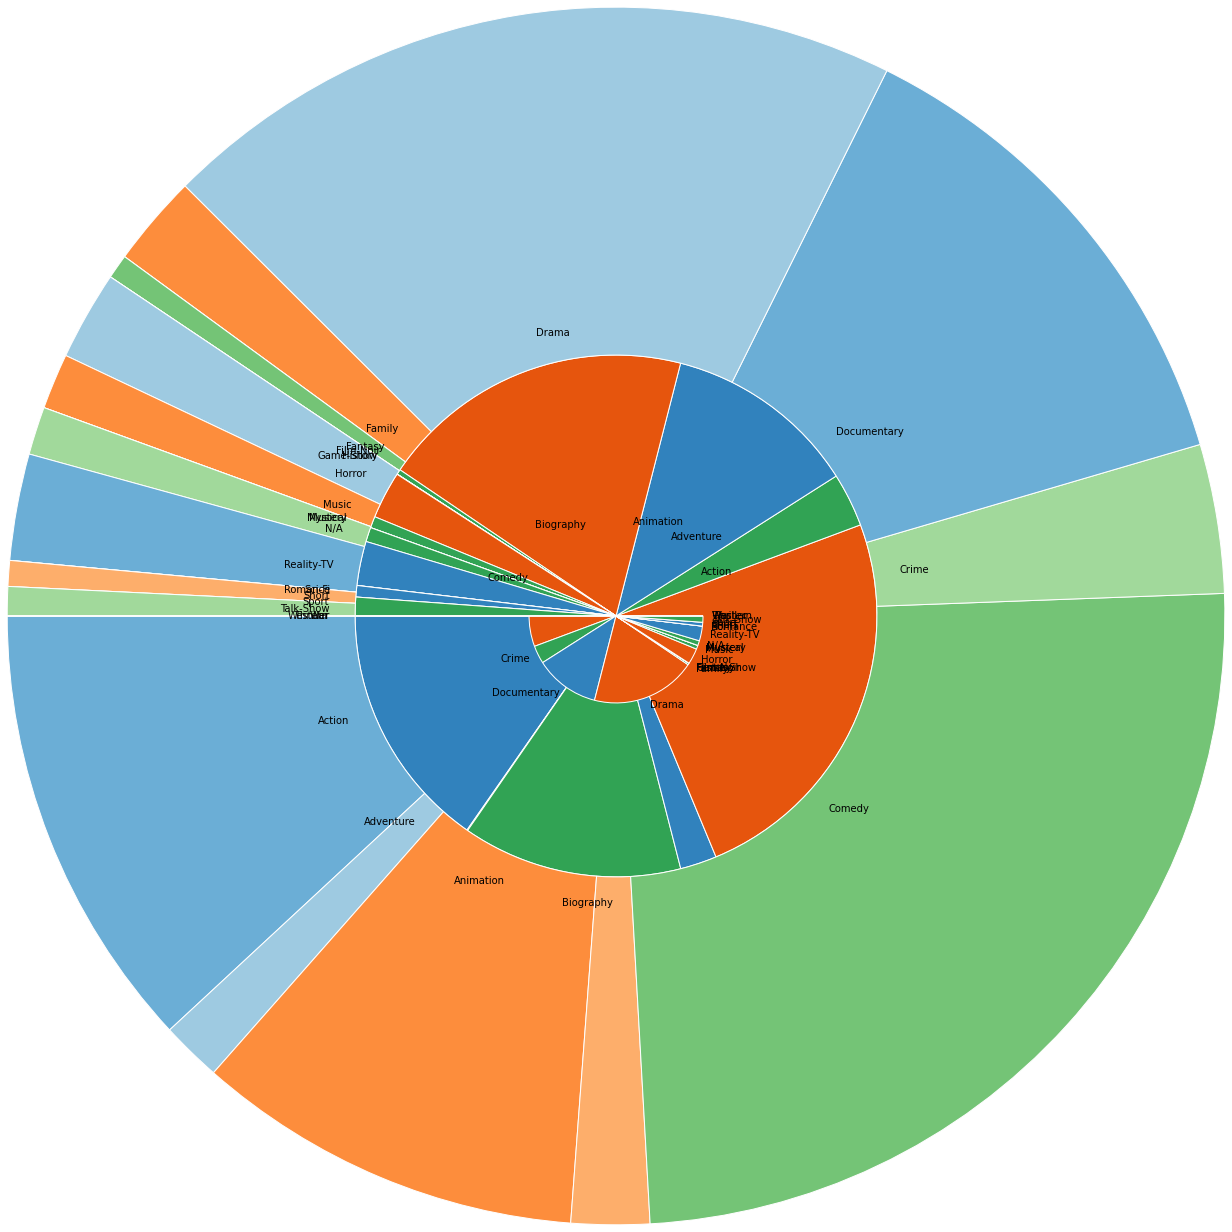

In [19]:
fig, ax = plt.subplots()
size = 4
x = genre_df['Genre']
y1= genre_df['Votes']
y2 = genre_df['Rating']

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(y1, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=x)

ax.pie(y2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels = x)

plt.title='Votes VS Rating'
plt.show()


<AxesSubplot:>

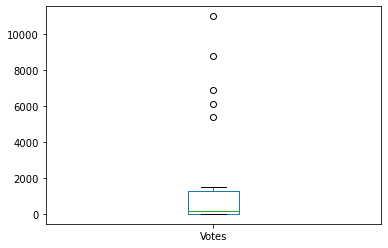

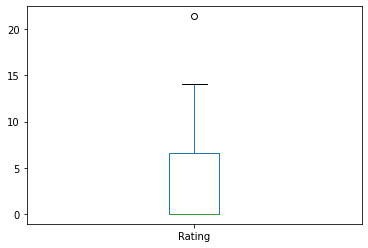

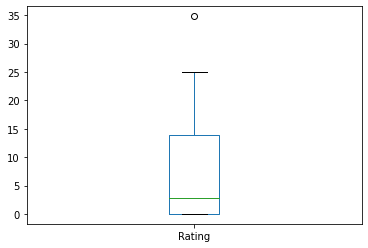

In [45]:
x = genre_df['Votes']
y = genre_df['Rating']

genre_df.plot('Genre','Votes', kind = 'box')
new_gen = genre_df.loc[genre_df['Votes']<1000,:]
new_gen.plot('Genre','Rating', kind = 'box')
new_gen = genre_df.loc[genre_df['Rating']<50,:]
new_gen.plot('Genre','Rating', kind = 'box')

r is 0.8580050068351348, p is 3.3027578338636775e-07


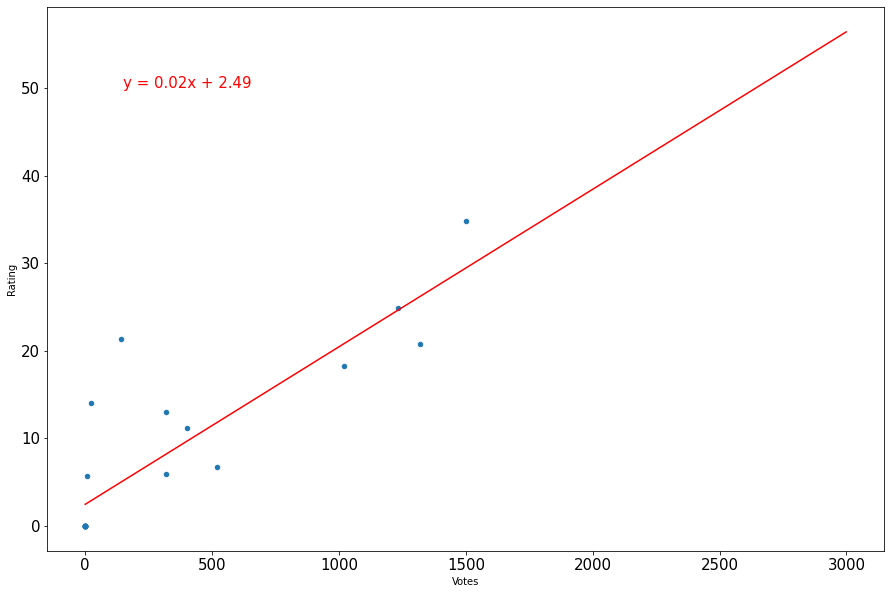

In [77]:
new_gen.plot('Votes','Rating', kind = 'scatter', figsize = (15,10), fontsize = 15)
x = new_gen['Votes']
y = new_gen['Rating']
slope, inter, r, p, std = st.linregress(x,y)
x_axis = np.arange(3000)
y_pred = slope*x_axis +inter
plt.plot(x_axis,y_pred, c='r')
print(f'r is {r}, p is {p}')
plt.annotate(f'y = {round(slope,2)}x + {round(inter,2)}', (150,50), c= 'r',fontsize = 15)
plt.show()

In [71]:
# t test means of ratings and votes of 2019 & 2020 